In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\\..'))
	print(os.getcwd())
except:
	pass


C:\Users\Thomas Athey\Documents\Labs\Labs\jovo\dos_and_donts


In [2]:
import numpy as np
from math import sqrt
from scipy.stats import pearsonr
from graspy.plot import heatmap
from sklearn.covariance import GraphicalLassoCV
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
np.random.seed(0)

In [3]:
#Generate x data
n=10
m=100
t=1000

data = np.random.normal(0,1,(n-1,t,m))
n0 = np.expand_dims(data[0,:,:] + data[1,:,:],axis=0)
data = np.concatenate((n0,data),axis=0)


0.7067379763230663
0.7071067811865475


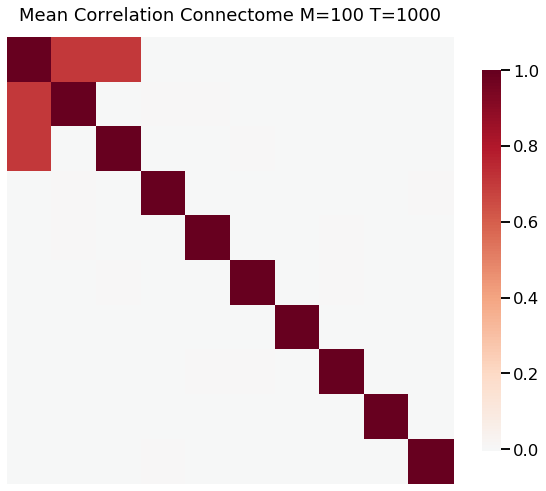

In [14]:
#Create connectomes and generate y from connection 0-1
connectomes = []
y = []
noise_sig = 0.0001

for subject in range(m):
    connectome = np.corrcoef(data[:,:,subject])
    connectomes.append(connectome)
    y.append(connectome[0,1] + np.random.normal(0,noise_sig))

connectomes = np.stack(connectomes,axis=2)
y = np.array(y)

mean_connectome = np.mean(connectomes,axis=2)
ttl = 'Mean Correlation Connectome M=' + str(m) + ' T=' + str(t)
heatmap(mean_connectome,title=ttl)
print(mean_connectome[0,1])
print(1/np.sqrt(2))


In [22]:
#Create feature vector which contains y and all connections
features = []
features.append(y)

for i in range(0,n):
    for j in range(i+1,n):
        edges = connectomes[i,j,:]
        features.append(edges)

features = np.stack(features,axis=1)



c:\users\thomas athey\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Correlation of Y and Edge 0-1: 0.79
Correlation of Y and Edge 1-2: 0.63
0.9983813054865336


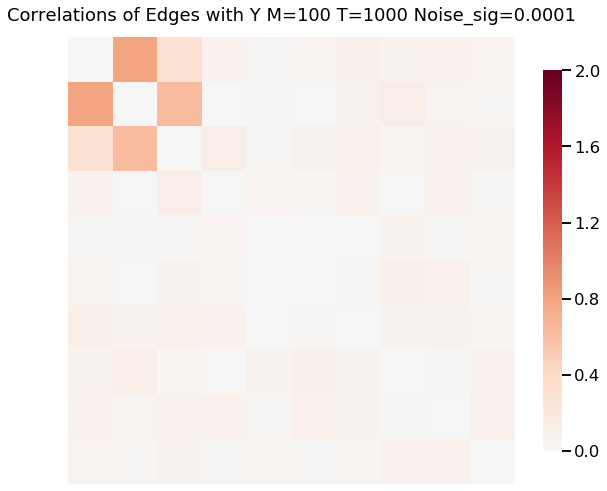

In [13]:
#All************************************graphical lasso
inds = np.triu_indices(n=n,k=1)

model = GraphicalLassoCV()
model.fit(features)
cov_ = model.covariance_
diags = np.power(np.diagonal(cov_),-1/2)
scale = np.diag(diags)
feature_corr_ = scale @ cov_ @ scale

edge_corrs = np.zeros((n,n))
edge_corrs[inds] = feature_corr_[0,1:]
edge_corrs = edge_corrs + edge_corrs.T
ttl = 'Correlations of Edges with Y M=' + str(m) + ' T=' + str(t) + ' Noise_sig=' + str(noise_sig)
heatmap(np.abs(edge_corrs),title=ttl,vmin=0,vmax=2)


print('Correlation of Y and Edge 0-1: %0.2f' % edge_corrs[0,1])
print('Correlation of Y and Edge 1-2: %0.2f' % edge_corrs[1,2])

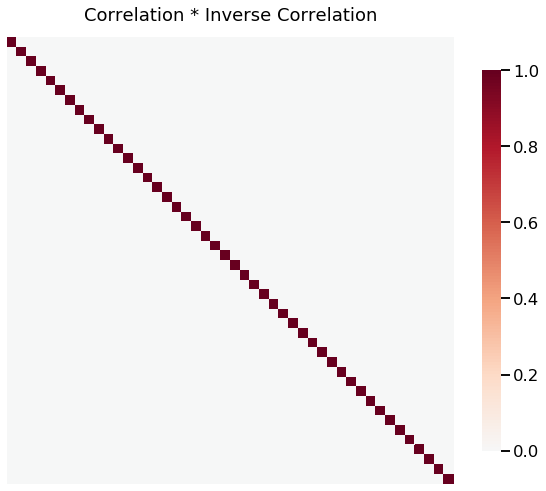

In [7]:
prec_ = model.precision_
diags = np.power(np.diagonal(cov_),1/2)
scale = np.diag(diags)
feature_invcorr_ = scale @ prec_ @ scale

heatmap(feature_corr_ @ feature_invcorr_, title='Correlation * Inverse Correlation')


InvCorrelation of Y and Edge 0-1: -1.86
InvCorrelation of Y and Edge 1-2: -0.82


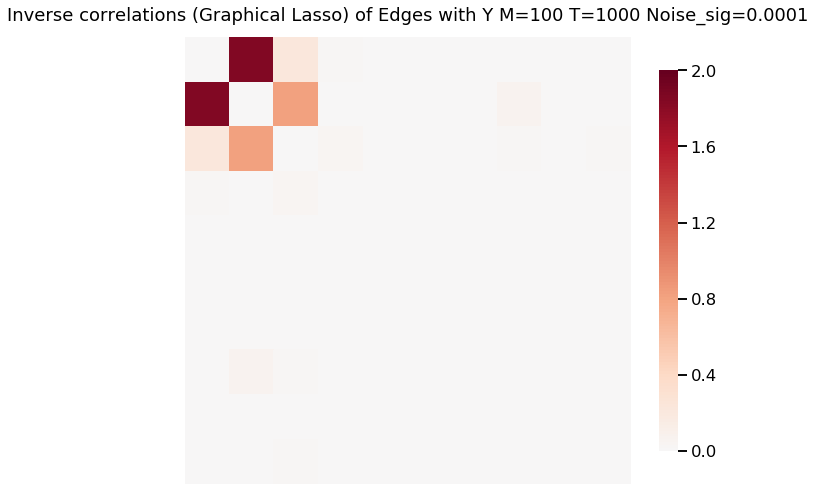

In [8]:

edge_invcorrs = np.zeros((n,n))
edge_invcorrs[inds] = feature_invcorr_[0,1:]
edge_invcorrs = edge_invcorrs + edge_invcorrs.T
ttl = 'Inverse correlations (Graphical Lasso) of Edges with Y M=' + str(m) + ' T=' + str(t) + ' Noise_sig=' + str(noise_sig)
heatmap(np.abs(edge_invcorrs),title=ttl,vmin=0,vmax=2)

print('InvCorrelation of Y and Edge 0-1: %0.2f' % edge_invcorrs[0,1])
print('InvCorrelation of Y and Edge 1-2: %0.2f' % edge_invcorrs[1,2])
#http://www.tulane.edu/~PsycStat/dunlap/Psyc613/RI2.html



Correlation of Y and Edge 0-1: 1.00
Correlation of Y and Edge 1-2: 0.72
Expected correlation of Y with Edge 0-1: 1.00


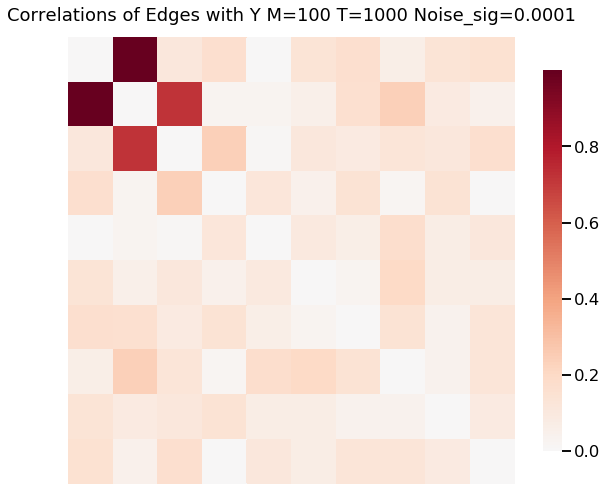

In [29]:
#All**************************normal
feature_corr_ = np.corrcoef(features.T)
edge_corrs = np.zeros((n,n))
edge_corrs[inds] = feature_corr_[0,1:]
edge_corrs = edge_corrs + edge_corrs.T
ttl = 'Correlations of Edges with Y M=' + str(m) + ' T=' + str(t) + ' Noise_sig=' + str(noise_sig)
heatmap(np.abs(edge_corrs),title=ttl)

print('Correlation of Y and Edge 0-1: %0.2f' % edge_corrs[0,1])
print('Correlation of Y and Edge 1-2: %0.2f' % edge_corrs[1,2])


a = np.sqrt(np.var(features[1,:])/(np.var(features[1,:])+noise_sig))
print('Expected correlation of Y with Edge 0-1: %0.2f'%a)


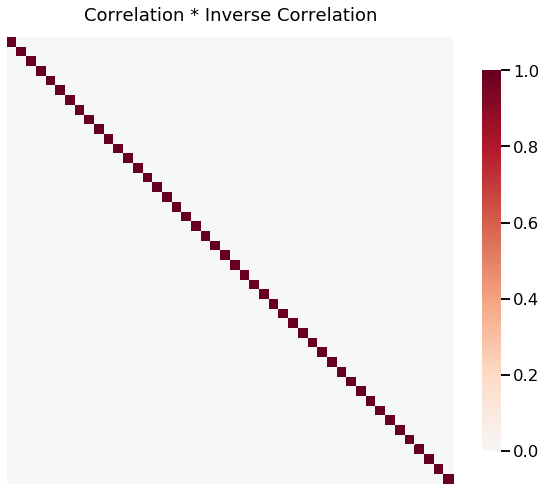

In [10]:
feature_invcorr_ = np.linalg.inv(feature_corr_)

heatmap(feature_corr_ @ feature_invcorr_, title='Correlation * Inverse Correlation')


InvCorrelation of Y and Edge 0-1: -23412.03
InvCorrelation of Y and Edge 1-2: -3541.53


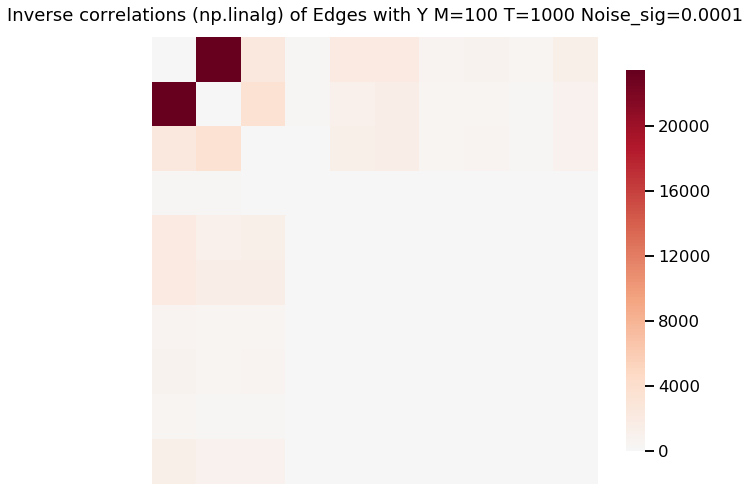

In [11]:

edge_invcorrs = np.zeros((n,n))
edge_invcorrs[inds] = feature_invcorr_[0,1:]
edge_invcorrs = edge_invcorrs + edge_invcorrs.T
ttl = 'Inverse correlations (np.linalg) of Edges with Y M=' + str(m) + ' T=' + str(t) + ' Noise_sig=' + str(noise_sig)
heatmap(np.abs(edge_invcorrs),title=ttl)

print('InvCorrelation of Y and Edge 0-1: %0.2f' % edge_invcorrs[0,1])
print('InvCorrelation of Y and Edge 1-2: %0.2f' % edge_invcorrs[1,2])

